<a href="https://colab.research.google.com/github/MiguelDavid0426/Segunda-entrega-algoritmos-geneticos/blob/main/Aplicaci%C3%B3n_AG_Sistemas_Inteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pygad

In [3]:
pip install Keras-Applications

     |████████████████████████████████| 50 kB 2.8 MB/s 


# Importación de librerias

In [5]:
#Librerias
import cv2
from google.colab.patches import cv2_imshow
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split

#Otras librerias necesarias de keras

from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
#from tensorflow.python.keras.applications import ResNet50
#from tensorflow.python.keras.models import Sequential
#from tensorflow.python.keras.layers import Dense

# Librerias para algoritmos geneticos
import tensorflow.keras
import pygad.kerasga
import pygad
import tensorflow as tf

#Carga de los datos

**ACCESO A GOOGLE DRIVE para Cargar Data**

In [52]:
#Montar google drive
from google.colab import drive
drive.mount('/content/drive')

% cd /content/drive/MyDrive/Colab Notebooks
#Acá debemos cargar los archivos de imagenes y etiquetas en google drive

#Cargar etiquetas
lab=np.load('labels.npy')

#Cargar imagenes
img=np.load('Imagenes_gris_240.npy')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


In [23]:
nombre_gpu = tf.test.gpu_device_name()
if nombre_gpu != '/device:GPU:0':
  raise SystemError("GPU no encontrada")
print('GPU encontrada: {}'.format(nombre_gpu))

GPU encontrada: /device:GPU:0


Aqui validamos la usabilidad del GPU en el entorno

In [24]:
img.shape

(2000, 240, 240)

In [25]:
lab.shape

(2000, 1)

# Entendimiento de los datos

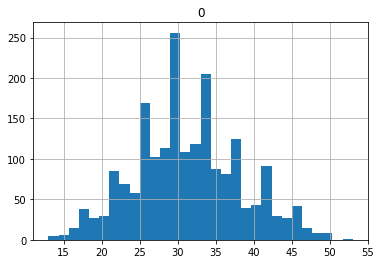

In [26]:
label=pd.DataFrame(lab)
label
label.hist(bins=30);

Podemos ver que la distribución de los conteos de objetos tienen una similitud a una normal, a continuación vemos los parametros de esta

In [ ]:
label.describe()

,0
count,2000.000000
mean,31.157500
std,6.945417
min,13.000000
25%,26.000000
50%,31.000000
75%,36.000000
max,53.000000


La media y la mediana son cercanas por lo que se puede esperar que los datos se distribuyan de manera normal con media de 30 personas por imagen.

**Ver una imagen**

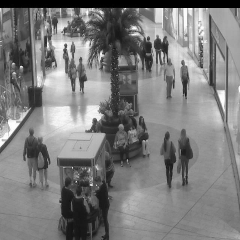

In [ ]:
img_gris = cv2.resize(img[1390], (240,240))
cv2_imshow(img_gris)

Realizamos una pequeña visualización del dataset

# Procesamiento de los datos

Se separa en validación y prueba

In [53]:
x_train, x_test, y_train, y_test = train_test_split(img, lab, test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(1600, 240, 240)
(400, 240, 240)


Se aumenta una dimensión del objeto matricial

In [54]:
train_X = x_train.reshape(-1, 240,240, 1)
test_X = x_test.reshape(-1, 240,240, 1)
train_X.shape, test_X.shape

((1600, 240, 240, 1), (400, 240, 240, 1))

Se normalizan los pixeles para poder mejorar el proceso de optimización

In [55]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# Contrucción del modelo

Realizamos un primer acercamiento construyendo una primera red y aplicando un algoritmo genetico

In [ ]:
#### Prueba Dave 1
def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model
    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)
    model.set_weights(weights=model_weights_matrix)
    predictions = model.predict(data_inputs)

    mae = tensorflow.keras.losses.MeanAbsoluteError()
    abs_error = mae(data_outputs, predictions).numpy() + 0.00000001
    solution_fitness = 1.0 / abs_error

    return solution_fitness

In [ ]:
#### Prueba Dave 1
def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

# Build the keras model using the functional API.
input_layer = tensorflow.keras.layers.Input(shape=(240, 240, 1))
conv_layer1 = tensorflow.keras.layers.Conv2D(filters=16,
                                             kernel_size=3,
                                             activation="relu")(input_layer)
max_pool1 = tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2),
                                                 strides=3)(conv_layer1)
conv_layer2 = tensorflow.keras.layers.Conv2D(filters=32,
                                             kernel_size=3,
                                             activation="relu")(max_pool1)
flatten_layer  = tensorflow.keras.layers.Flatten()(conv_layer2)
dense_layer = tensorflow.keras.layers.Dense(32, activation="relu")(flatten_layer)
output_layer = tensorflow.keras.layers.Dense(1, activation="linear")(dense_layer)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)


Generation = 1
Fitness    = 0.10870885005881412
Generation = 2
Fitness    = 0.10870885005881412
Generation = 3
Fitness    = 0.10870885005881412
Generation = 4
Fitness    = 0.10870885005881412
Generation = 5
Fitness    = 0.10870885005881412
Generation = 6
Fitness    = 0.10870885005881412
Generation = 7
Fitness    = 0.10870885005881412
Generation = 8
Fitness    = 0.10870885005881412
Generation = 9
Fitness    = 0.10870885005881412
Generation = 10
Fitness    = 0.10870885005881412
Generation = 11
Fitness    = 0.10870885005881412
Generation = 12
Fitness    = 0.10870885005881412
Generation = 13
Fitness    = 0.10870885005881412
Generation = 14
Fitness    = 0.10870885005881412
Generation = 15
Fitness    = 0.10870885005881412
Generation = 16
Fitness    = 0.10870885005881412
Generation = 17
Fitness    = 0.10870885005881412
Generation = 18
Fitness    = 0.10870885005881412
Generation = 19
Fitness    = 0.10870885005881412
Generation = 20
Fitness    = 0.10870885005881412
Generation = 21
Fitness    = 

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:3135: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


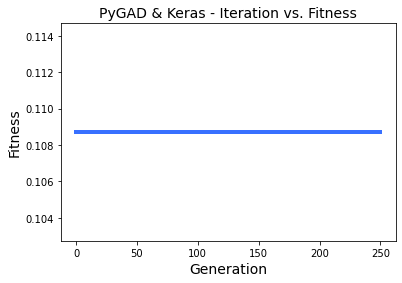

Fitness value of the best solution = 0.10870885005881412
Index of the best solution : 0
Absolute Error :  9.198883


In [ ]:
#### Prueba Dave 1
# Data inputs
data_inputs = x_train

# Data outputs
data_outputs = y_train

num_generations = 250
num_parents_mating = 10
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)

ga_instance.run()

ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
# print("Predictions : \n", predictions)

# Calculate the categorical crossentropy for the trained model.
mae = tensorflow.keras.losses.MeanAbsoluteError()
abs_error = mae(data_outputs, predictions).numpy()
print("Absolute Error : ", abs_error)

# Protocolo experimental: Cuadro Latino


Aqui se proceden a realizar las diferentes arquitecturas expuestas en el documento entregable, para determiner cual es la mejor configuración de red

In [ ]:
# create model 
model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(128, (3,3), input_shape=(240,240,1), activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)  
    
])

model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.SGD(lr=1e-4), metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 128)     1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 236, 236, 128)     147584    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 234, 234, 128)     147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 117, 117, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 115, 115, 128)     147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 113, 113, 128)     147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 111, 111, 128)     1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history1 = model.fit(train_X, y_train, validation_data=(test_X, y_test), epochs=15, batch_size=4)

Epoch 1/15
400/400 [==============================] - 204s 418ms/step - loss: 462.5822 - mae: 16.5150 - val_loss: 45.3154 - val_mae: 5.3346
Epoch 2/15
400/400 [==============================] - 173s 433ms/step - loss: 58.8640 - mae: 6.0849 - val_loss: 46.5617 - val_mae: 5.4354
Epoch 3/15
400/400 [==============================] - 167s 416ms/step - loss: 58.2498 - mae: 6.0967 - val_loss: 46.2519 - val_mae: 5.4191
Epoch 4/15
400/400 [==============================] - 173s 433ms/step - loss: 58.6703 - mae: 6.1477 - val_loss: 48.0447 - val_mae: 5.4466
Epoch 5/15
400/400 [==============================] - 173s 432ms/step - loss: 56.2145 - mae: 5.9575 - val_loss: 47.7969 - val_mae: 5.4374
Epoch 6/15
400/400 [==============================] - 166s 416ms/step - loss: 58.2233 - mae: 6.0936 - val_loss: 47.6905 - val_mae: 5.5388
Epoch 7/15
400/400 [==============================] - 167s 417ms/step - loss: 58.6782 - mae: 6.1585 - val_loss: 52.4306 - val_mae: 5.6953
Epoch 8/15
400/400 [============

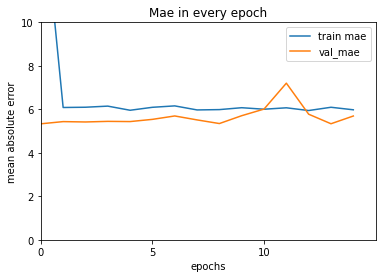

In [ ]:
# plot mae
plt.plot(history1.history['mae'])
plt.plot(history1.history['val_mae'])
plt.legend(['train mae', 'val_mae'])
plt.ylim(0, 10)
plt.xlim(10, 15)

plt.xticks(np.arange(0,15, 5))

plt.xlabel('epochs')
plt.ylabel('mean absolute error')
plt.title('Mae in every epoch')
plt.show()

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_X, y_test, batch_size=4)
print("test mse:", results[1])

Evaluate on test data
100/100 [==============================] - 3s 30ms/step - loss: 23.1482 - mae: 3.8893
test mse: 3.8893117904663086


In [ ]:
from keras.utils.vis_utils import plot_model

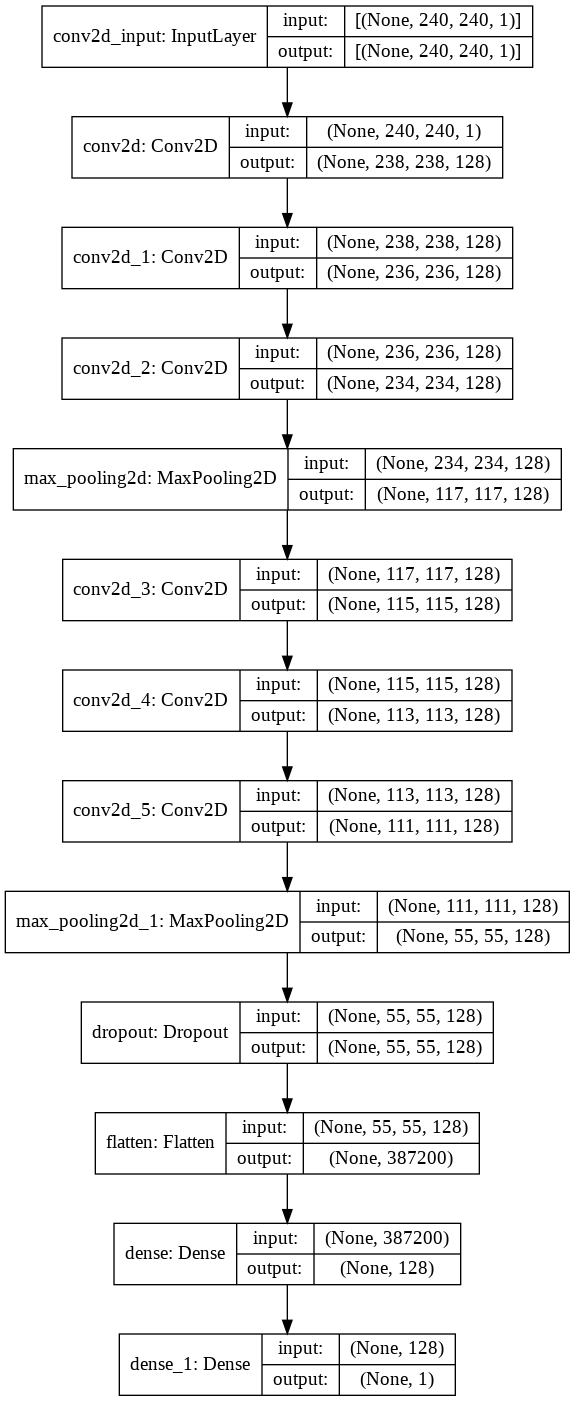

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Parte 2: Implementación AG

Una pequeña prueba del paquete de GA 

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:469: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))
/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:3135: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be 

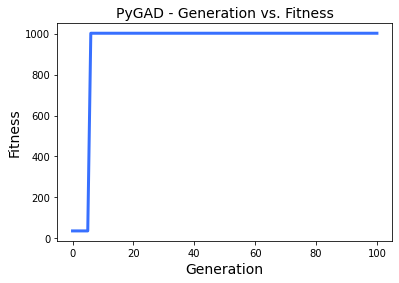

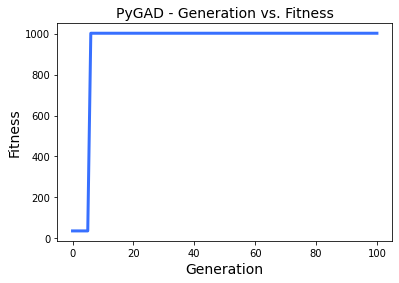

In [ ]:
import pygad
import numpy

function_inputs = [4,-2,3.5,5,-11,-4.7]
desired_output = 44 

def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 100
num_parents_mating = 10
sol_per_pop = 20
num_genes = len(function_inputs)

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_func,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes)

ga_instance.run()

ga_instance.plot_result()

In [ ]:
# create model 
model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(128, (3,3), input_shape=(240,240,1), activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)  
    
])

model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.SGD(lr=1e-4), metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 128)     1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 236, 236, 128)     147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 118, 118, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 116, 116, 128)     147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 114, 114, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 57, 57, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 57, 57, 128)       0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:


def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)

    mae = tensorflow.keras.losses.MeanAbsoluteError()
    abs_error = mae(data_outputs, predictions) + 0.012
    solution_fitness = 1.0 / abs_error

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))


In [ ]:
weights_vector = pygad.kerasga.model_weights_as_vector(model=model)

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=4)

In [ ]:
train_X.shape


(1600, 240, 240, 1)

In [ ]:
train_X = train_X[:200, :240,:240,:1]

In [ ]:
train_X.shape

(200, 240, 240, 1)

In [ ]:
y_train.shape

(1600, 1)

In [ ]:
y_train = y_train[:200,:1]

In [ ]:
y_train.shape

(200, 1)

In [ ]:
y_test.shape

(400, 1)

In [ ]:
y_test = y_test[:200,:1]

Generation = 1
Fitness    = 0.031527249044431674
Generation = 2
Fitness    = 0.031527249044431674
Generation = 3
Fitness    = 0.031527249044431674
Generation = 4
Fitness    = 0.031527249044431674
Generation = 5
Fitness    = 0.031527249044431674
Generation = 6
Fitness    = 0.031527249044431674
Generation = 7
Fitness    = 0.031527249044431674
Generation = 8
Fitness    = 0.031527249044431674
Generation = 9
Fitness    = 0.031527249044431674
Generation = 10
Fitness    = 0.031527249044431674
Generation = 11
Fitness    = 0.031527249044431674
Generation = 12
Fitness    = 0.031527249044431674
Generation = 13
Fitness    = 0.031527249044431674
Generation = 14
Fitness    = 0.031527249044431674
Generation = 15
Fitness    = 0.031527249044431674
Generation = 16
Fitness    = 0.031527249044431674
Generation = 17
Fitness    = 0.031527249044431674
Generation = 18
Fitness    = 0.031527249044431674
Generation = 19
Fitness    = 0.031527249044431674
Generation = 20
Fitness    = 0.031527249044431674


/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:3135: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


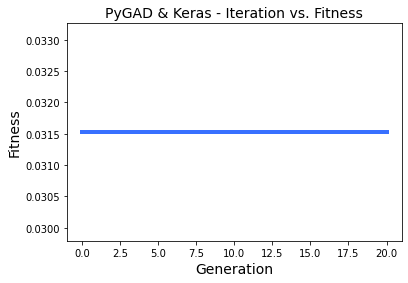

Fitness value of the best solution = 0.031527249044431674
Index of the best solution : 0


In [ ]:
# Data inputs
data_inputs = train_X

# Data outputs
data_outputs = y_test

num_generations = 20
num_parents_mating = 4
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)
ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
#print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)

In [ ]:
ga_instance.best_solution_generation

0

In [ ]:
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
print("Predictions : \n", predictions)

mae = tensorflow.keras.losses.MeanAbsoluteError()
abs_error = mae(data_outputs, predictions).numpy()
print("Absolute Error : ", abs_error)

Predictions : 
 [[-3.88648012e-04]
 [-2.79630488e-03]
 [-7.61253154e-03]
 [-5.34081226e-03]
 [-7.67388660e-03]
 [-1.34052709e-03]
 [ 8.09400692e-04]
 [-1.80635287e-03]
 [-8.06860439e-03]
 [-1.80198252e-03]
 [-2.62404396e-03]
 [ 2.40760739e-03]
 [-1.87320984e-04]
 [-5.26858959e-03]
 [ 2.67281826e-03]
 [-6.72813552e-03]
 [-1.28424894e-02]
 [-2.40430795e-03]
 [ 2.80938111e-03]
 [ 6.08378556e-04]
 [-1.01346131e-02]
 [ 6.55014766e-04]
 [-1.10984500e-03]
 [ 3.43885436e-03]
 [ 4.06779628e-03]
 [-9.67257470e-03]
 [-1.09103639e-02]
 [-4.87228995e-03]
 [-4.45881998e-03]
 [-1.85398234e-03]
 [-7.78072607e-03]
 [ 9.18971375e-04]
 [ 9.79960896e-05]
 [-4.95602190e-03]
 [-1.23122418e-02]
 [ 1.61228620e-03]
 [-9.78826173e-03]
 [-4.63043107e-03]
 [ 1.58231892e-03]
 [-4.00840258e-03]
 [-1.08628534e-04]
 [-7.61130452e-03]
 [-5.60334884e-03]
 [-2.64780433e-03]
 [-5.38860727e-03]
 [-4.92580188e-03]
 [-2.23389128e-04]
 [-5.27009973e-03]
 [-6.82576606e-03]
 [ 7.04499520e-03]
 [-4.46571317e-03]
 [-8.47908948e-

## Otra red entrenada con GA

In [30]:
data_inputs = train_X

# Data outputs
data_outputs = y_train

In [31]:
import pygad.nn
import pygad.gann

def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs

    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs)
    
    mae = tensorflow.keras.losses.MeanAbsoluteError()
    abs_error = mae(data_outputs, predictions) + 0.012
    solution_fitness = 1.0 / abs_error

    return solution_fitness

#def fitness_func(solution, sol_idx):
#    global data_inputs, data_outputs, keras_ga, model

#    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
#                                                                 weights_vector=solution)

#    model.set_weights(weights=model_weights_matrix)

#    predictions = model.predict(data_inputs)

#    mae = tensorflow.keras.losses.MeanAbsoluteError()
#    abs_error = mae(data_outputs, predictions) + 0.012
#    solution_fitness = 1.0 / abs_error

#    return solution_fitness

In [32]:
def callback_generation(ga_instance):
    global GANN_instance

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks, population_vectors=ga_instance.population)
    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)

In [35]:
num_inputs = data_inputs.shape[1]
num_classes = 2

num_solutions = 4
GANN_instance = pygad.gann.GANN(num_solutions=num_solutions,
                                num_neurons_input=num_inputs,
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=num_classes,
                                hidden_activations=["relu"],
                                output_activation="sigmoid")

In [37]:
num_inputs

240

In [40]:
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

initial_population = population_vectors.copy()

num_parents_mating = 4

num_generations = 20

mutation_percent_genes = 5

parent_selection_type = "sss"

crossover_type = "single_point"

mutation_type = "random" 

keep_parents = 1

init_range_low = -2
init_range_high = 5

In [41]:
ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       mutation_percent_genes=mutation_percent_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       callback_generation=callback_generation)

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:731: UserWarning: Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
  if not self.suppress_warnings: warnings.warn("Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.")


In [42]:
ga_instance.run()

ValueError: ignored

## Otra red convolucional con GA

In [56]:
import numpy

train_inputs = data_inputs
train_outputs = data_outputs

In [44]:
import pygad.cnn

input_layer = pygad.cnn.Input2D(input_shape=(240, 240, 1))
conv_layer = pygad.cnn.Conv2D(num_filters=2,
                              kernel_size=3,
                              previous_layer=input_layer,
                              activation_function="relu")
average_pooling_layer = pygad.cnn.AveragePooling2D(pool_size=5,
                                                   previous_layer=conv_layer,
                                                   stride=3)

flatten_layer = pygad.cnn.Flatten(previous_layer=average_pooling_layer)
dense_layer = pygad.cnn.Dense(num_neurons=4,
                              previous_layer=flatten_layer,
                              activation_function="sigmoid")

In [45]:
model = pygad.cnn.Model(last_layer=dense_layer,
                        epochs=5,
                        learning_rate=0.01)

In [ ]:
model.summary()


----------Network Architecture----------
<class 'pygad.cnn.cnn.Conv2D'>
<class 'pygad.cnn.cnn.AveragePooling2D'>
<class 'pygad.cnn.cnn.Flatten'>
<class 'pygad.cnn.cnn.Dense'>
----------------------------------------



In [46]:
import pygad.gacnn

GACNN_instance = pygad.gacnn.GACNN(model=model,
                                   num_solutions=4)

In [47]:
def fitness_func(solution, sol_idx):
    global GACNN_instance, data_inputs, data_outputs

    predictions = GACNN_instance.population_networks[sol_idx].predict(data_inputs=data_inputs)
    correct_predictions = numpy.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100

    return solution_fitness

In [48]:
population_vectors = pygad.gacnn.population_as_vectors(population_networks=GACNN_instance.population_networks)

initial_population = population_vectors.copy()

num_parents_mating = 2

num_generations = 10

mutation_percent_genes = 0.1

parent_selection_type = "sss"

crossover_type = "single_point"

mutation_type = "random"

keep_parents = -1

In [49]:
ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       mutation_percent_genes=mutation_percent_genes,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       callback_generation=callback_generation)

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:731: UserWarning: Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
  if not self.suppress_warnings: warnings.warn("Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.")


In [50]:
def callback_generation(ga_instance):
    global GACNN_instance, last_fitness

    population_matrices = pygad.gacnn.population_as_matrices(population_networks=GACNN_instance.population_networks, population_vectors=ga_instance.population)

    GACNN_instance.update_population_trained_weights(population_trained_weights=population_matrices)

In [51]:
ga_instance.run()

KeyboardInterrupt: ignored

In [59]:
#### Prueba Dave 2
import numpy

train_inputs = x_train
train_outputs = y_train

import pygad.cnn

input_layer = pygad.cnn.Input2D(input_shape=(240, 240, 1))
conv_layer = pygad.cnn.Conv2D(num_filters=4,
                              kernel_size=3,
                              previous_layer=input_layer,
                              activation_function="relu")
average_pooling_layer = pygad.cnn.AveragePooling2D(pool_size=4,
                                                   previous_layer=conv_layer,
                                                   stride=3)
conv_layer1 = pygad.cnn.Conv2D(num_filters=4,
                              kernel_size=3,
                              previous_layer=average_pooling_layer,
                              activation_function="relu")
average_pooling_layer1 = pygad.cnn.AveragePooling2D(pool_size=4,
                                                   previous_layer=conv_layer1,
                                                   stride=3)

flatten_layer = pygad.cnn.Flatten(previous_layer=average_pooling_layer)
dense_layer = pygad.cnn.Dense(num_neurons=1,
                              previous_layer=flatten_layer,
                              activation_function="softmax")

model = pygad.cnn.Model(last_layer=dense_layer,
                        epochs=20,
                        learning_rate=0.01)

import pygad.gacnn

GACNN_instance = pygad.gacnn.GACNN(model=model,
                                   num_solutions=1)

def fitness_func(solution, sol_idx):
    global GACNN_instance, data_inputs, data_outputs

    predictions = GACNN_instance.population_networks[sol_idx].predict(data_inputs=data_inputs)
    correct_predictions = numpy.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100

    return solution_fitness

def callback_generation(ga_instance):
    global GACNN_instance, last_fitness

    population_matrices = pygad.gacnn.population_as_matrices(population_networks=GACNN_instance.population_networks, population_vectors=ga_instance.population)

    GACNN_instance.update_population_trained_weights(population_trained_weights=population_matrices)

population_vectors = pygad.gacnn.population_as_vectors(population_networks=GACNN_instance.population_networks)
initial_population = population_vectors.copy()
num_parents_mating = 1
num_generations = 100
mutation_percent_genes = 0.2
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
keep_parents = -1
ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       mutation_percent_genes=mutation_percent_genes,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       callback_generation=callback_generation)


/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:731: UserWarning: Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
  if not self.suppress_warnings: warnings.warn("Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.")


In [ ]:
ga_instance.run()
ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
# print("Predictions : \n", predictions)

# Calculate the categorical crossentropy for the trained model.
mae = tensorflow.keras.losses.MeanAbsoluteError()
abs_error = mae(data_outputs, predictions).numpy()
print("Absolute Error : ", abs_error)